### Script for reading data for Problem 4.2 (data_MoleculeTypes.txt) in Applied Statistics 2021 exam:

This script reads the file __"data_MoleculeTypes.txt"__ for Problem 4.2 in the exam of Applied Statistics 2021/22. This data files contains 986 entries in two columns: 

* **size** ($\mathrm{\mu m}$) of particles,
* **intensity** of particles.

The script was distributed along with the exam and the data file itself on the 20th of January 2022.

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 19th of January 2022 (first version)

In [108]:
import random
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm ,gamma           # Functions from SciPy Stats...
# import scipy.optimize as optimization
from scipy import optimize
from numpy.linalg import inv
from functools import partial
from fitter import Fitter
from astropy.modeling import models, fitting

In [109]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [110]:
import pandas as pd

In [111]:
dataframe = pd.read_csv('data_MoleculeTypes.csv', header=0, index_col=None)
size, intensity = dataframe.values.T
dataframe

,size(microm),intensity
0,45.267,0.800
1,43.549,0.736
2,41.326,0.390
3,26.767,0.281
4,24.066,0.220
...,...,...
981,44.660,0.576
982,41.076,0.744
983,42.454,0.657
984,53.994,0.698


Print the first 10 entries to check the content of the file:

In [112]:
for i in range(10):
    print(f"  size = {size[i]:4.3f} microm    intensity = {intensity[i]:5.3f}")

  size = 45.267 microm    intensity = 0.800
  size = 43.549 microm    intensity = 0.736
  size = 41.326 microm    intensity = 0.390
  size = 26.767 microm    intensity = 0.281
  size = 24.066 microm    intensity = 0.220
  size = 48.232 microm    intensity = 0.766
  size = 27.078 microm    intensity = 0.655
  size = 46.099 microm    intensity = 0.577
  size = 45.537 microm    intensity = 0.543
  size = 44.078 microm    intensity = 0.659


In [113]:
print(np.min(size),np.max(size))

2.487 72.426


In [114]:
size2=np.zeros_like(size)
#size3=[]

In [115]:
'''
for i in range(0,986):
    if size[i]==0:
        size3[i]=size[i]
print(size3)
'''

'\nfor i in range(0,986):\n    if size[i]==0:\n        size3[i]=size[i]\nprint(size3)\n'

In [116]:
for j in range(0,986):
    if intensity[j]>0.50:
        size2[j]=size[j]
size4 = size2[size2 != 0]
print(size4.size)

828


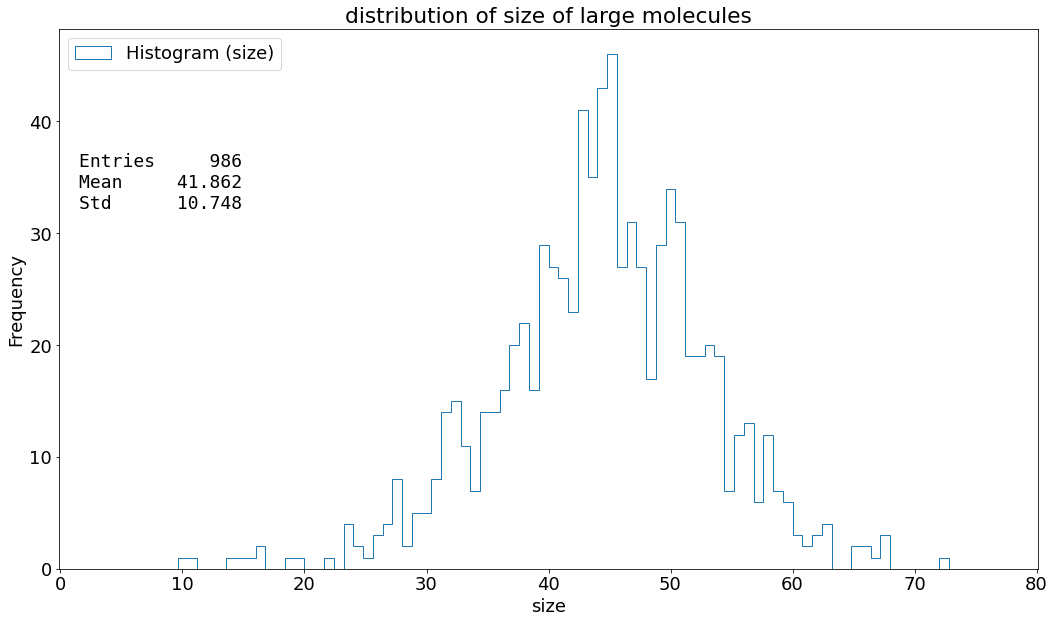

In [117]:
Nbins = 100
xmin2,xmax2=0,80
binWidth= (xmax2-xmin2)/Nbins
fig2, ax2 = plt.subplots(figsize=(15, 9))
ax2.hist(size4, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (size)' )
ax2.set(xlabel="size", ylabel="Frequency", xlim=(xmin2-0.1, xmax2+0.1))



# Define the figure text
d2 = {'Entries': len(size),
      'Mean': size.mean(),
      'Std': size.std(ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.77, text2, ax2, fontsize=18)

# Add legend
ax2.legend(loc='upper left')
plt.title('distribution of size of large molecules')
fig2.tight_layout()


In [118]:
def fit_pdf(x, mu, sigma):
    return np.size(size4) * binWidth * (1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2))

In [119]:
x_all=size4
xmin, xmax=xmin2, xmax2
counts, bin_edges = np.histogram(x_all, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0]) 

In [120]:

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(mu,sigma) :
    y_fit = fit_pdf(x,mu,sigma)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf,x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,mu=40,sigma=10)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 80.9                       │              Nfcn = 45               │
│ EDM = 4.22e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   44.65   │   0.28    │            │            │         │         │       │
│ 1 │ sigma │   8.02    │   0.25    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │   0.0757 -0.00236 │
│ sigma │ -0.00236    0.063 │
└───────┴───────────────────┘

In [121]:

# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_mu,fit_sigma= minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.5f}")


Fit value: mu = 44.65251 +/- 0.27518
Fit value: sigma = 8.02073 +/- 0.25102
Chi2 value: 80.9   Ndof = 62    Prob(Chi2,Ndof) = 0.05387


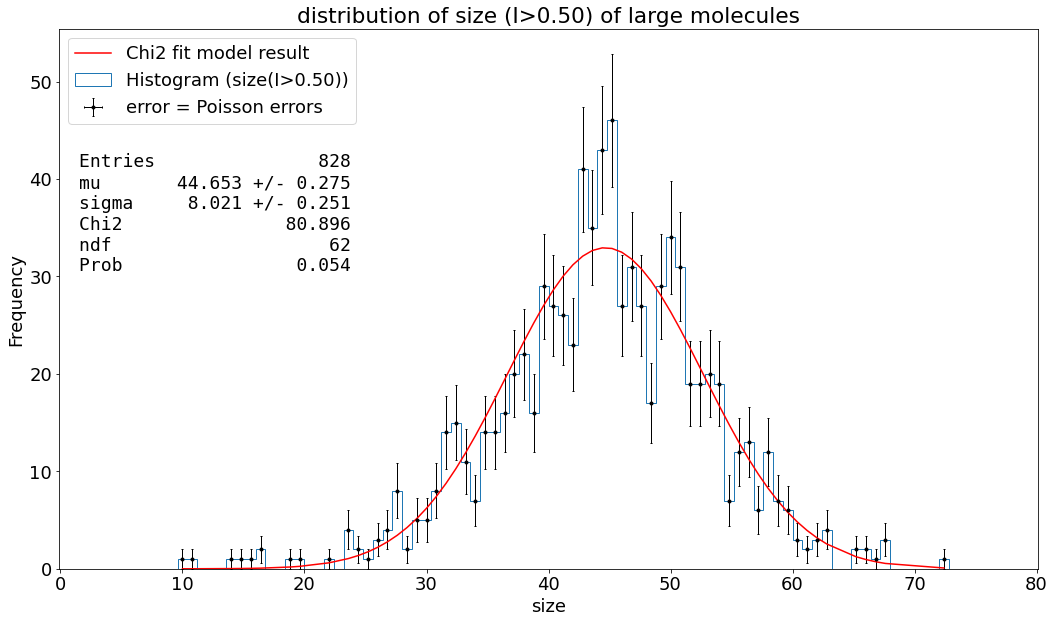

In [123]:
Nbins = 100

fig2, ax2 = plt.subplots(figsize=(15, 9))

ax2.hist(size4, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (size(I>0.50))' )
ax2.set(xlabel="size", ylabel="Frequency", xlim=(xmin2-0.1, xmax2+0.1))

ax2.errorbar(x, y, yerr=sy, xerr=0.0, label='error = Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

x_axis = np.linspace(xmin, xmax, 100)
ax2.plot(x, fit_pdf(x, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Define the figure text
d2 = {'Entries': len(size4),
      
      'mu': [minuit_chi2.values['mu'], minuit_chi2.errors['mu']],
      'sigma': [minuit_chi2.values['sigma'], minuit_chi2.errors['sigma']],
      'Chi2':     chi2_value,
      'ndf':      Ndof_value,
      'Prob':     Prob_value,
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.77, text2, ax2, fontsize=18)



# Add legend
ax2.legend(loc='upper left')
plt.title('distribution of size (I>0.50) of large molecules')
fig2.tight_layout()

# Save figure
fig2.savefig("fig5.png", dpi=600)